<a href="https://colab.research.google.com/github/AlfonsoVasquezC/ComputervisionMNA/blob/main/Proyecto_Equipo_1_AvanceJoel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

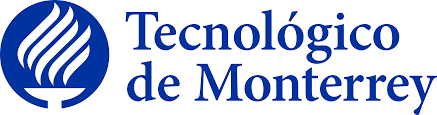

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Visión computacional para imágenes y video**
###Tecnológico de Monterrey
###Dr. Gilberto Ochoa Ruiz

## 4.2 Google Colab - Algoritmos de mejoramiento de imágenes usando operaciones morfológicas



**Por:**

* A01183284 RODRIGO RODRIGUEZ RODRIGUEZ
* A01793132 RIGOBERTO VEGA ESCUDERO
* A01016308 ALEXIS HERNANDEZ MARTINEZ
* A00820656 JUAN ALFONSO VASQUEZ CHAPOI
* A00759664 JOEL ORLANDO HERNANDEZ RAMOS

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import matplotlib.image as mpig
from sklearn.cluster import MeanShift, estimate_bandwidth
%matplotlib inline

In [ ]:
def gethistogram(im,title):
  hist_full = cv.calcHist([im],[0],None,[256],[0,256])
  plt.plot(hist_full)
  plt.title(title)
  plt.show()

## **Introducción**


### **Segmentación**

La segmentación de imágenes es una técnica comúnmente utilizada en el procesamiento y análisis de imágenes digitales para dividir una imagen en varias partes o regiones. Usualmente este división se lleva acabo en función de las características de los píxeles de la imagen. En la segmentaciónm, la imagen queda dividida en diferentes regiones, de modo que cada región es homogénea, pero la unión de dos regiones adyacentes no lo es. 

Está técnica es un componente crítico y esencial para cualquier sistema de analisis de imagenes y reconociemiento de patrones. El algoritmo implementado para la segmentacion de imagenes determinara la calidad del resultado final del analisis. En este sentido, la segmentación es una de las tareas más dificiles dentro del procesamiento de imágenes. Por esto mismo, a lo largo de los años, se han desarrollado varios algoritmos y técnicas para la segmentación de imágenes utilizando conocimientos específicos del dominio para resolver de manera efectiva los problemas de segmentación en distintas areas de aplicacion específica. Estas aplicaciones incluyen:

* imágenes médicas
* conducción automatizada 
* videovigilancia 
* reconocimiento y detección facial
* procesamiento de imagenes satelitales
* entre otras aplicaciones de visión artificial.

Aunque son muchas las aplicaciones, el objetivo principal en todas es reducir la complejidad de la imagen y permitir un mayor procesamiento o análisis de cada segmento de la imagen. Técnicamente, la segmentación es la asignación de etiquetas a píxeles para identificar objetos, personas u otros elementos importantes en la imagen. El algoritmo de segmetnacion es una función que toma entradas de imagen y produce una salida. La salida es una máscara o una matriz con varios elementos que especifican la clase de objeto o la instancia a la que pertenece cada píxel.

Como se menciono, existen varias técnicas y tipos de segmentación entre las que destacan: 

1. Edge-based Segmentation
2. Threshold-based Segmentation
3. Region-based Segmentation}
4. **Cluster-based Segmentation**
5. Watershed Segmentation.

En este proyecto, se profundizará especificamente en una técinca de segmentación basade en Clusters conocida como Mean Shift











Referencias:

https://datagen.tech/guides/image-annotation/image-segmentation/

H.D. Cheng; X.H. Jiang; Y. Sun; Jingli Wang (2001). Color image segmentation: advances and prospects. , 34(12), 2259–2281.         doi:10.1016/s0031-3203(00)00149-7  

https://www.mathworks.com/discovery/image-segmentation.html#:~:text=Image%20segmentation%20is%20a%20commonly,the%20pixels%20in%20the%20image.

https://www.tensorflow.org/tutorials/images/segmentation?hl=en


### **Mean Shift**



Mean shift es un algoritmo de aprendizaje no supervisado que se utiliza principalmente para la agrupación o Clustering. EL nombre de la técnica deriva del hecho de que en cada iteración del algoritmo hay un "desplazamiento de la media". Está técnica se usa ampliamente en el análisis de datos del mundo real  porque no es paramétrico y no requiere ninguna forma predefinida de los grupos en el espacio de características. Cómo se menciono con anterioridad, esta técnica es ampliamente utilizada en la segmentación de imágenes para su procesamiento o para aplicaciones de visión computacional.

En esta aplicación espécifica, el algoritmo lo que hace es que para cada píxel de una imagen (que tiene una ubicación espacial y un color particular), se determina el conjunto de píxeles vecinos (dentro de un radio espacial y una distancia de color definida). Para este conjunto de píxeles vecinos, se calculan el nuevo centro espacial (media espacial) y el nuevo valor medio de color. Estos valores medios calculados servirán como el nuevo centro para la próxima iteración. El procedimiento descrito se repetirá hasta que la media espacial y de color (o escala de grises) deje de cambiar. Al final de la iteración, el color medio final se asignará a la posición inicial de esa iteración.

En este sentido, el algoritmo de Mean Shift considera, usualmente, 3 variables de entrada:

* Una función  para medir distancias entre píxeles. Usualmente se utiliza la funcion de distancoia Euclediana. 
* Un radio. Todos los píxeles dentro de este radio (medido según la distancia anterior) se tendrán en cuenta para el cálculo.
* Una diferencia de valor. De todos los píxeles dentro del radio r, tomaremos solo aquellos cuyos valores estén dentro de esta diferencia para calcular la media.





Referencias:

https://stackoverflow.com/questions/4831813/image-segmentation-using-mean-shift-explained#:~:text=The%20Mean%20Shift%20segmentation%20is,is%20within%20a%20distance%20d.

https://imagej.nih.gov/ij/plugins/mean-shift.html#:~:text=Mean%20shift%20filtering%20is%20a,defined%20color%20distance)%20is%20determined.

https://towardsdatascience.com/understanding-mean-shift-clustering-and-implementation-with-python-6d5809a2ac40#:~:text=Mean%20shift%20is%20an%20unsupervised,clusters%20in%20the%20feature%20space.


## **Mean Shift - Código**

Number of segments:  7


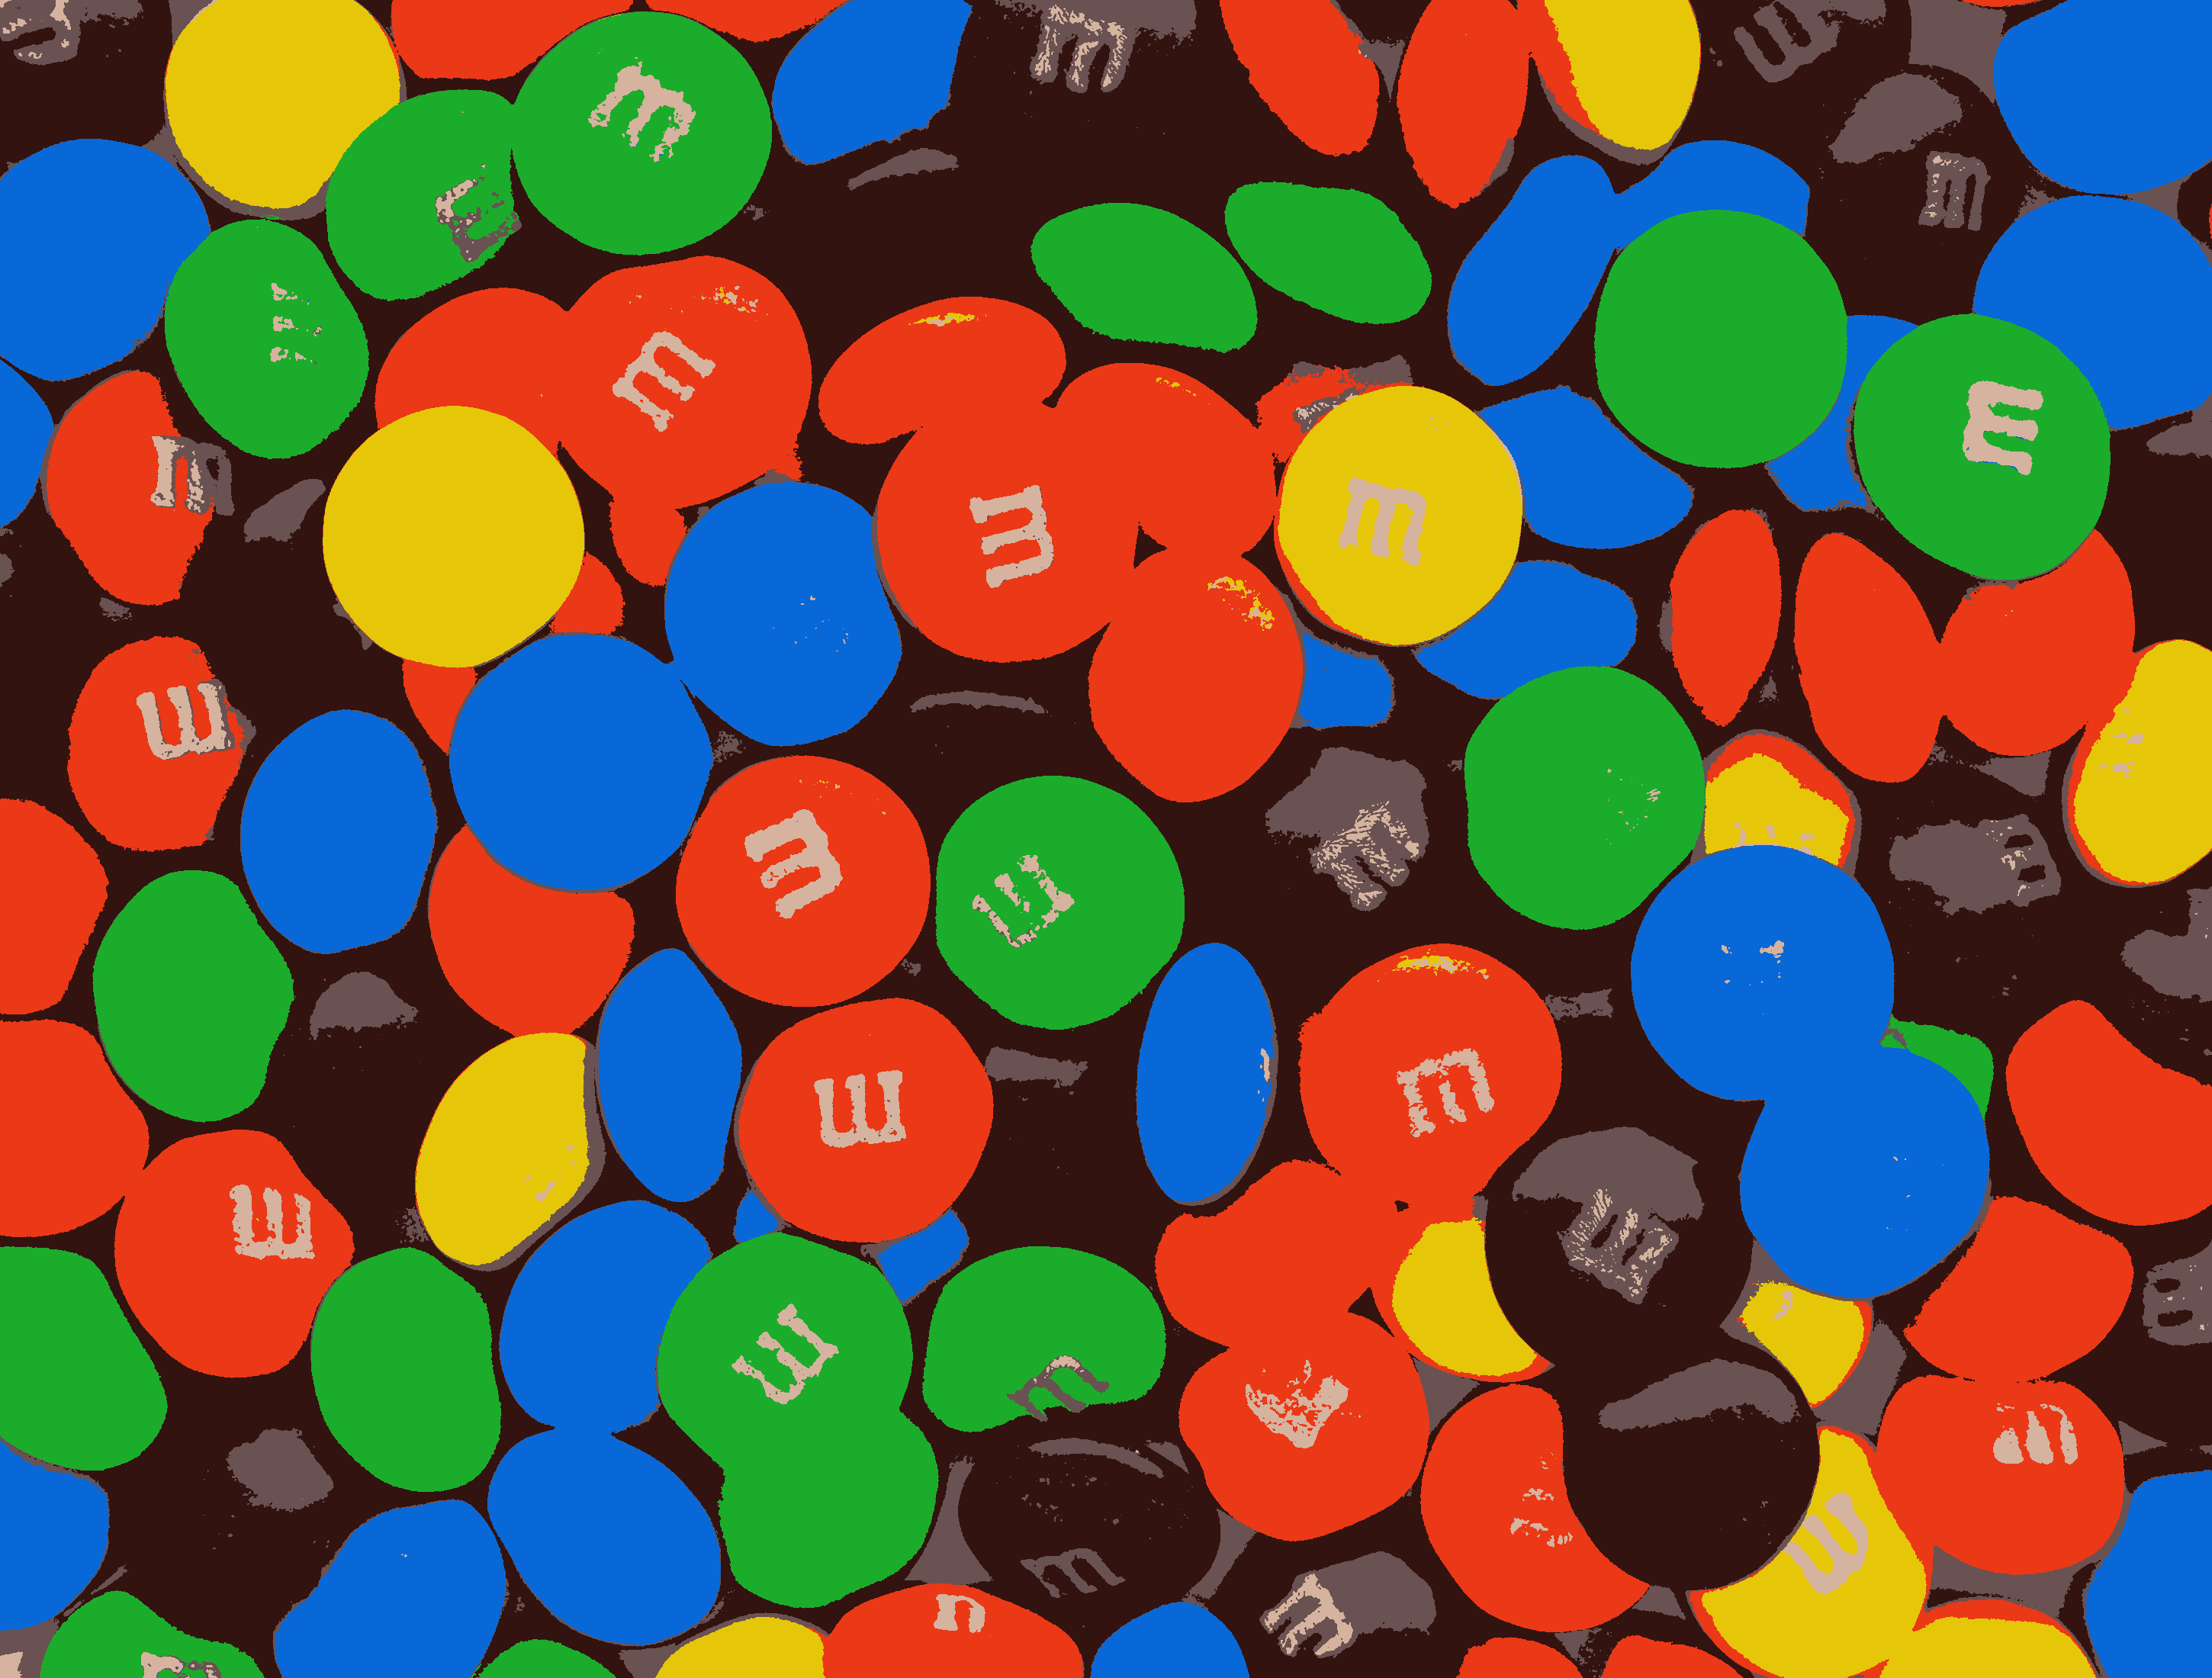

In [ ]:
img = cv.imread("/content/Plain-M&Ms-Pile.jpg")

# filter to reduce noise
img = cv.medianBlur(img, 3)

# flatten the image
flat_image = img.reshape((-1,3))
flat_image = np.float32(flat_image)

# meanshift
bandwidth = estimate_bandwidth(flat_image, quantile=.06, n_samples=3000)
ms = MeanShift(bandwidth=bandwidth, max_iter=800, bin_seeding=True)
ms.fit(flat_image)
labeled=ms.labels_


# get number of segments
segments = np.unique(labeled)
print('Number of segments: ', segments.shape[0])

# get the average color of each segment
total = np.zeros((segments.shape[0], 3), dtype=float)
count = np.zeros(total.shape, dtype=float)
for i, label in enumerate(labeled):
    total[label] = total[label] + flat_image[i]
    count[label] += 1
avg = total/count
avg = np.uint8(avg)

# cast the labeled image into the corresponding average color
res = avg[labeled]
result = res.reshape((img.shape))

# show the result
from google.colab.patches import cv2_imshow
cv2_imshow(result)
cv.waitKey(0)
cv.destroyAllWindows()